In [1]:
import pandas as pd 
df=pd.read_csv("automobile.csv",header=0)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-mpg,price,horsepower-binned,price-binned,diesel,gas,std,turbo,city-L/100km,highway-L/100km
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,27,13495.0,Low,Low,0,1,1,0,11.190476,8.703704
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,27,16500.0,Low,Low,0,1,1,0,11.190476,8.703704
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,26,16500.0,Medium,Low,0,1,1,0,12.368421,9.038462
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,30,13950.0,Low,Low,0,1,1,0,9.791667,7.833333
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,22,17450.0,Low,Low,0,1,1,0,13.055556,10.681818


(0.0, 53295.76807298971)

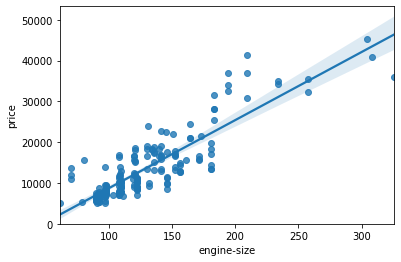

In [4]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [5]:
df[["price","engine-size"]].corr()

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


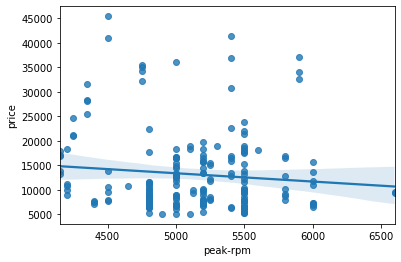

In [6]:
sns.regplot(x="peak-rpm",y="price",data=df)

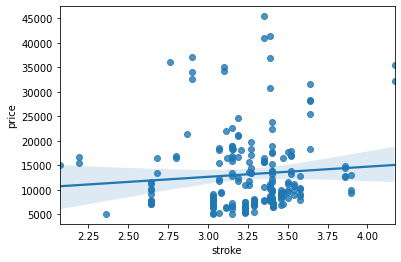

In [7]:
sns.regplot(x="stroke",y="price",data=df)

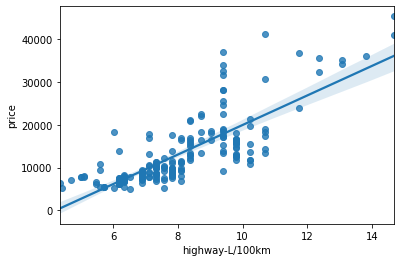

In [8]:
sns.regplot(x="highway-L/100km",y="price",data=df)

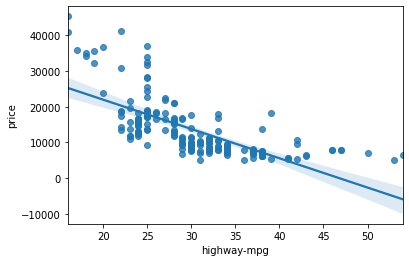

In [9]:
sns.regplot(x="highway-mpg",y="price",data=df)

In [10]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
hf=pd.read_csv("first.data",names=headers)
hf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
import numpy as np

In [12]:
hf.replace("?",np.nan,inplace=True)
hf.dropna(subset=["price"],axis=0,inplace=True)
hf["highway-mpg"].isnull().value_counts()

False    201
Name: highway-mpg, dtype: int64

In [13]:
df["highway-mpg"]=hf["highway-mpg"]

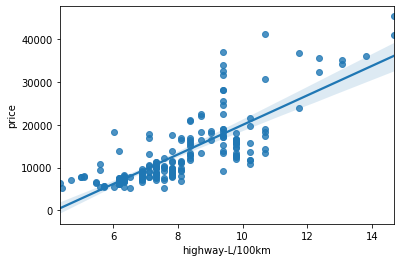

In [14]:
sns.regplot(x="highway-L/100km",y="price",data=df)

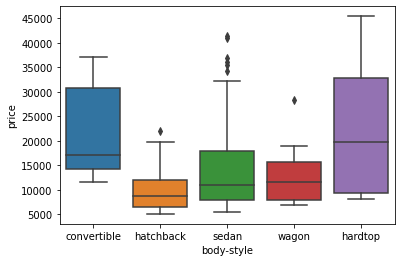

In [15]:
sns.boxplot(x="body-style",y="price",data=df)

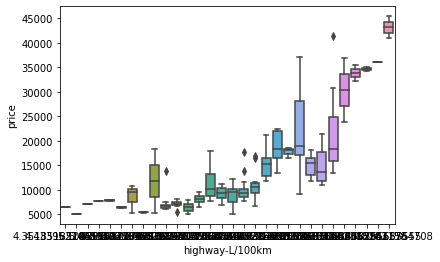

In [16]:
sns.boxplot(x="highway-L/100km",y="price",data=df)

In [17]:
df.dtypes


symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg          float64
price                float64
horsepower-binned     object
price-binned          object
diesel                 int64
gas                    int64
std                    int64
turbo                  int64
city-L/100km         float64
highway-L/100km      float64
dtype: object

In [18]:
df1=df[["body-style","drive-wheels","price"]]
grouped_test1 = df1.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [19]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [20]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [21]:
df2=df[["body-style","price"]]
grouped_test2=df2.groupby(["body-style"],as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


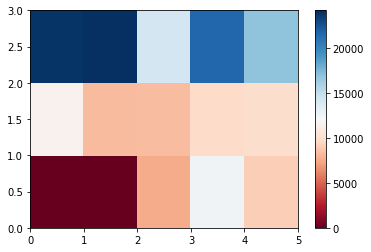

In [22]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [23]:
df2=df[["price","make"]]
grp1=df2.groupby(["make"],as_index=False)

In [24]:
grp1=grp1.mean()
# grp1=grp1.std()

<BarContainer object of 22 artists>

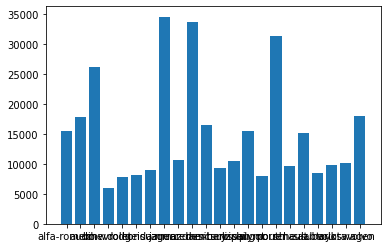

In [25]:
from matplotlib import pyplot
pyplot.bar((grp1["make"]),grp1["price"])

In [26]:
 def f(a, b, *args):
	print(args)
f(1,5,10,15)

(10, 15)


In [38]:
import csv

with open("automobile.csv") as f:
    mp=list(csv.DictReader(f))
    mp[]

OrderedDict([('symboling', '3'),
             ('normalized-losses', '122'),
             ('make', 'alfa-romero'),
             ('num-of-doors', 'two'),
             ('body-style', 'convertible'),
             ('drive-wheels', 'rwd'),
             ('engine-location', 'front'),
             ('wheel-base', '88.6'),
             ('length', '168.8'),
             ('width', '64.1'),
             ('height', '0.8160535117056856'),
             ('curb-weight', '2548'),
             ('engine-type', 'dohc'),
             ('num-of-cylinders', 'four'),
             ('engine-size', '130'),
             ('fuel-system', 'mpfi'),
             ('bore', '3.47'),
             ('stroke', '2.68'),
             ('compression-ratio', '9.0'),
             ('horsepower', '111'),
             ('peak-rpm', '5000.0'),
             ('city-mpg', '21'),
             ('highway-mpg', '27'),
             ('price', '13495.0'),
             ('horsepower-binned', 'Low'),
             ('price-binned', 'Low'),
             (